# Bilby-MCMC I: introduction

In this tutorial, we will get started with the [Bilby-MCMC](https://arxiv.org/abs/2106.08730) sampler. Unlike the other samples available through Bilby, Bilby-MCMC is part of the Bilby package itself, yuo can find the [implementation here](https://git.ligo.org/lscsoft/bilby/-/tree/master/bilby/bilby_mcmc).

## Setup

As usual, we will begin by importing the modules we need, setting up inline plots in `jupyter`, and clearing any existing output.

In [1]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outdir = "outdir_Bilby-MCMC_I"
! rm -rf outdir_Bilby-MCMC_I/

### Simulate the data
Okay, now let's create some example problem. We'll use a sinusoid in white Gaussian noise with a known variance for this problem.

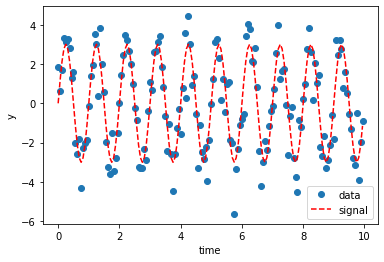

In [2]:
# First define the signal model
def signal(time, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * time)


# Now we define the injection parameters which we make simulated data with
simulation_parameters = dict(amplitude=3, frequency=1)

# For this example, we'll use standard Gaussian noise

# These lines of code generate the fake data. Note the ** just unpacks the
# contents of the simulation_parameters when calling the model function.
sampling_frequency = 16
time_duration = 10
time = np.arange(0, time_duration, 1 / sampling_frequency)
N = len(time)
sigma = np.random.normal(1, 0.01, N)
data = signal(time, **simulation_parameters) + np.random.normal(0, sigma, N)

# We quickly plot the data to check it looks sensible
fig, ax = plt.subplots()
ax.plot(time, data, 'o', label='data')
ax.plot(time, signal(time, **simulation_parameters), '--r', label='signal')
ax.set_xlabel('time')
ax.set_ylabel('y')
ax.legend()
plt.show()

### Create the likelihood and priors

Okay, the final setup step is to create the `likelihood` and `prior` objects. Here, we using a Gaussian likelihood with a known standard deviation `sigma` and uniform priors over the three model parameters.

In [3]:
likelihood = bilby.likelihood.GaussianLikelihood(time, data, signal, sigma=sigma)

priors = dict()
priors['amplitude'] = bilby.core.prior.Uniform(0, 5, 'amplitude')
priors['frequency'] = bilby.core.prior.Uniform(0, 2, 'frequency')

## Using Bilby-MCMC: initial example

To use the `bilby_mcmc` sampler, we pass `bilby_mcmc` as the `sampler` argument to `run_sampler`. We have also set a few others options and provided comments about why:

In [4]:
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    injection_parameters=simulation_parameters,  # Used in plots to show the "true" values
    outdir=outdir,  # The directory to store the results
    label="runA",  # A label to name results/plots with
    sampler='bilby_mcmc',  # Use the bilby_mcmc sampler
    printdt=5,  # Print an update on the progress every 5 seconds
    nsamples=500,  # The number of effective samples to draw before stopping
    ntemps=6,  # The number of parallel-temperatures to use
    resume=False,  # Force the sampler to start from scratch
    adapt=False  # Switch off dynamic adaptation of the temperatures, this is not recommended in general
)

13:04 bilby INFO    : Running for label 'runA', output will be saved to 'outdir_Bilby-MCMC_I'
13:04 bilby INFO    : Search parameters:
13:04 bilby INFO    :   amplitude = Uniform(minimum=0, maximum=5, name='amplitude', latex_label='amplitude', unit=None, boundary=None)
13:04 bilby INFO    :   frequency = Uniform(minimum=0, maximum=2, name='frequency', latex_label='frequency', unit=None, boundary=None)
13:04 bilby INFO    : Single likelihood evaluation took 2.594e-04 s
13:04 bilby INFO    : Using sampler Bilby_MCMC with kwargs {'nsamples': 500, 'nensemble': 1, 'pt_ensemble': False, 'ntemps': 6, 'Tmax': None, 'Tmax_from_SNR': 20, 'initial_betas': None, 'adapt': False, 'adapt_t0': 100, 'adapt_nu': 10, 'pt_rejection_sample': False, 'burn_in_nact': 10, 'thin_by_nact': 1, 'fixed_discard': 0, 'autocorr_c': 5, 'L1steps': 100, 'L2steps': 3, 'npool': 1, 'printdt': 5, 'min_tau': 1, 'proposal_cycle': 'default', 'stop_after_convergence': False, 'fixed_tau': None, 'tau_window': None, 'evidence_metho

7.40e+01|0:00:05|5.40e+01(10tau)|t=1|n=20|a=0.10|e=4.5e-02%|0.68ms/ev|maxl=-230.91|ETF=0:00:32
1.47e+02|0:00:10|1.27e+02(z1)|t=1|n=20|a=0.12|e=2.3e-02%|0.69ms/ev|maxl=-230.91|ETF=0:00:32
2.20e+02|0:00:15|1.27e+02(z1)|t=1|n=93|a=0.13|e=7.0e-02%|0.69ms/ev|maxl=-230.91|ETF=0:00:28
2.91e+02|0:00:20|1.27e+02(z1)|t=1|n=164|a=0.13|e=9.4e-02%|0.71ms/ev|maxl=-230.91|ETF=0:00:23
3.62e+02|0:00:25|1.27e+02(z1)|t=1|n=235|a=0.14|e=1.1e-01%|0.71ms/ev|maxl=-230.91|ETF=0:00:18
4.31e+02|0:00:30|1.27e+02(z1)|t=1|n=304|a=0.14|e=1.2e-01%|0.73ms/ev|maxl=-230.91|ETF=0:00:14
5.04e+02|0:00:35|1.27e+02(z1)|t=1|n=377|a=0.14|e=1.2e-01%|0.69ms/ev|maxl=-230.91|ETF=0:00:08
5.75e+02|0:00:40|1.27e+02(z1)|t=1|n=448|a=0.14|e=1.3e-01%|0.71ms/ev|maxl=-230.91|ETF=0:00:03
6.47e+02|0:00:45|1.27e+02(z1)|t=1|n=520|a=0.14|e=1.3e-01%|0.70ms/ev|maxl=-230.91|ETF=0


13:05 bilby INFO    : Reached convergence: exiting sampling
13:05 bilby INFO    : Checkpoint start
13:05 bilby INFO    : Written checkpoint file outdir_Bilby-MCMC_I/runA_resume.pickle
13:05 bilby INFO    : Zero-temperature proposals:
13:05 bilby INFO    : AdaptiveGaussianProposal(acceptance_ratio:0.23,n:1.3e+04,scale:0.0027,)
13:05 bilby INFO    : DifferentialEvolutionProposal(acceptance_ratio:0.47,n:1.3e+04,)
13:05 bilby INFO    : UniformProposal(acceptance_ratio:1,n:91,)
13:05 bilby INFO    : KDEProposal(acceptance_ratio:7.6e-05,n:1.3e+04,trained:0,)
13:05 bilby INFO    : GMMProposal(acceptance_ratio:0,n:1.3e+04,trained:0,)
13:05 bilby INFO    : NormalizingFlowProposal(acceptance_ratio:0,n:1.3e+04,trained:0,)
13:05 bilby INFO    : Current taus={'amplitude': 1, 'frequency': 1}
13:05 bilby INFO    : Temperature swaps = 215
13:05 bilby INFO    : Temp:0<->1|beta=1|hot-samp=520|swap=0.52|conv=True|
13:05 bilby INFO    : Temp:1<->2|beta=0.3466|hot-samp=611|swap=0.52|conv=True|
13:05 bilby 

Okay, sampling has now finished. Let's take a look at what is stored in the `outdir`:

In [6]:
! ls outdir_Bilby-MCMC_I/

runA_E0_T0_checkpoint_trace.png  runA_E0_stepping_stone.png  runA_resume.pickle
runA_E0_beta_lnl.png		 runA_result.json


We have some images, the stored result file `runA_result.json`, and the resume file `runA_resume.pickle`. Let's go through each of these to understand what they do.
* `runA_result.json` this is a copy of `result` object returned by `run_sampler` (see above). You can load it up with `bilby.core.result.read_in_result(FILENAME)` if you want to use the results elsewhere.
* `runA_resume.pickle` this is a file that stores the progress of the run at each checkpoint. By default, `bilby_mcmc` writes a checkpoint every 30 mins. You can change this by passing `check_point_delta_t=X` to run sampler, where `X` is the time in seconds at which you want to checkpoint. If you stop a run, an attempt will be made to write a checkpoint file before the program exits. If you restart a run and a checkpoint file exists (and `resume=True` is passed), the analysis will start from you it left off. 
* `runA_E0_beta_lnl.png` and `runA_E0_stepping_stone.png` are graphical representations of the thermodynamic integration and stepping stone methods to estimate the evidence.
* `runA_E0_T0_checkpoint_trace.png` this is a graphical illustration of the sampler progress at each checkpoint (or, if the run is finished, at the end). Let's take a look at the trace for our analysis above (see next code block). There are five rows of images. The first 2 rows contain the sample evolution and a histogram of the posterior for the `frequency` and `amplitude`. Next, there are evolution and histogram plots for the sample log-likelihood and log-prior values. These are useful to debug an analysis: watch out for points where a larger log-likelihood is suddenly found! Finally, there is a plot showing the evolution of the estimated ACT `tau`. Again, this is useful for debugging.

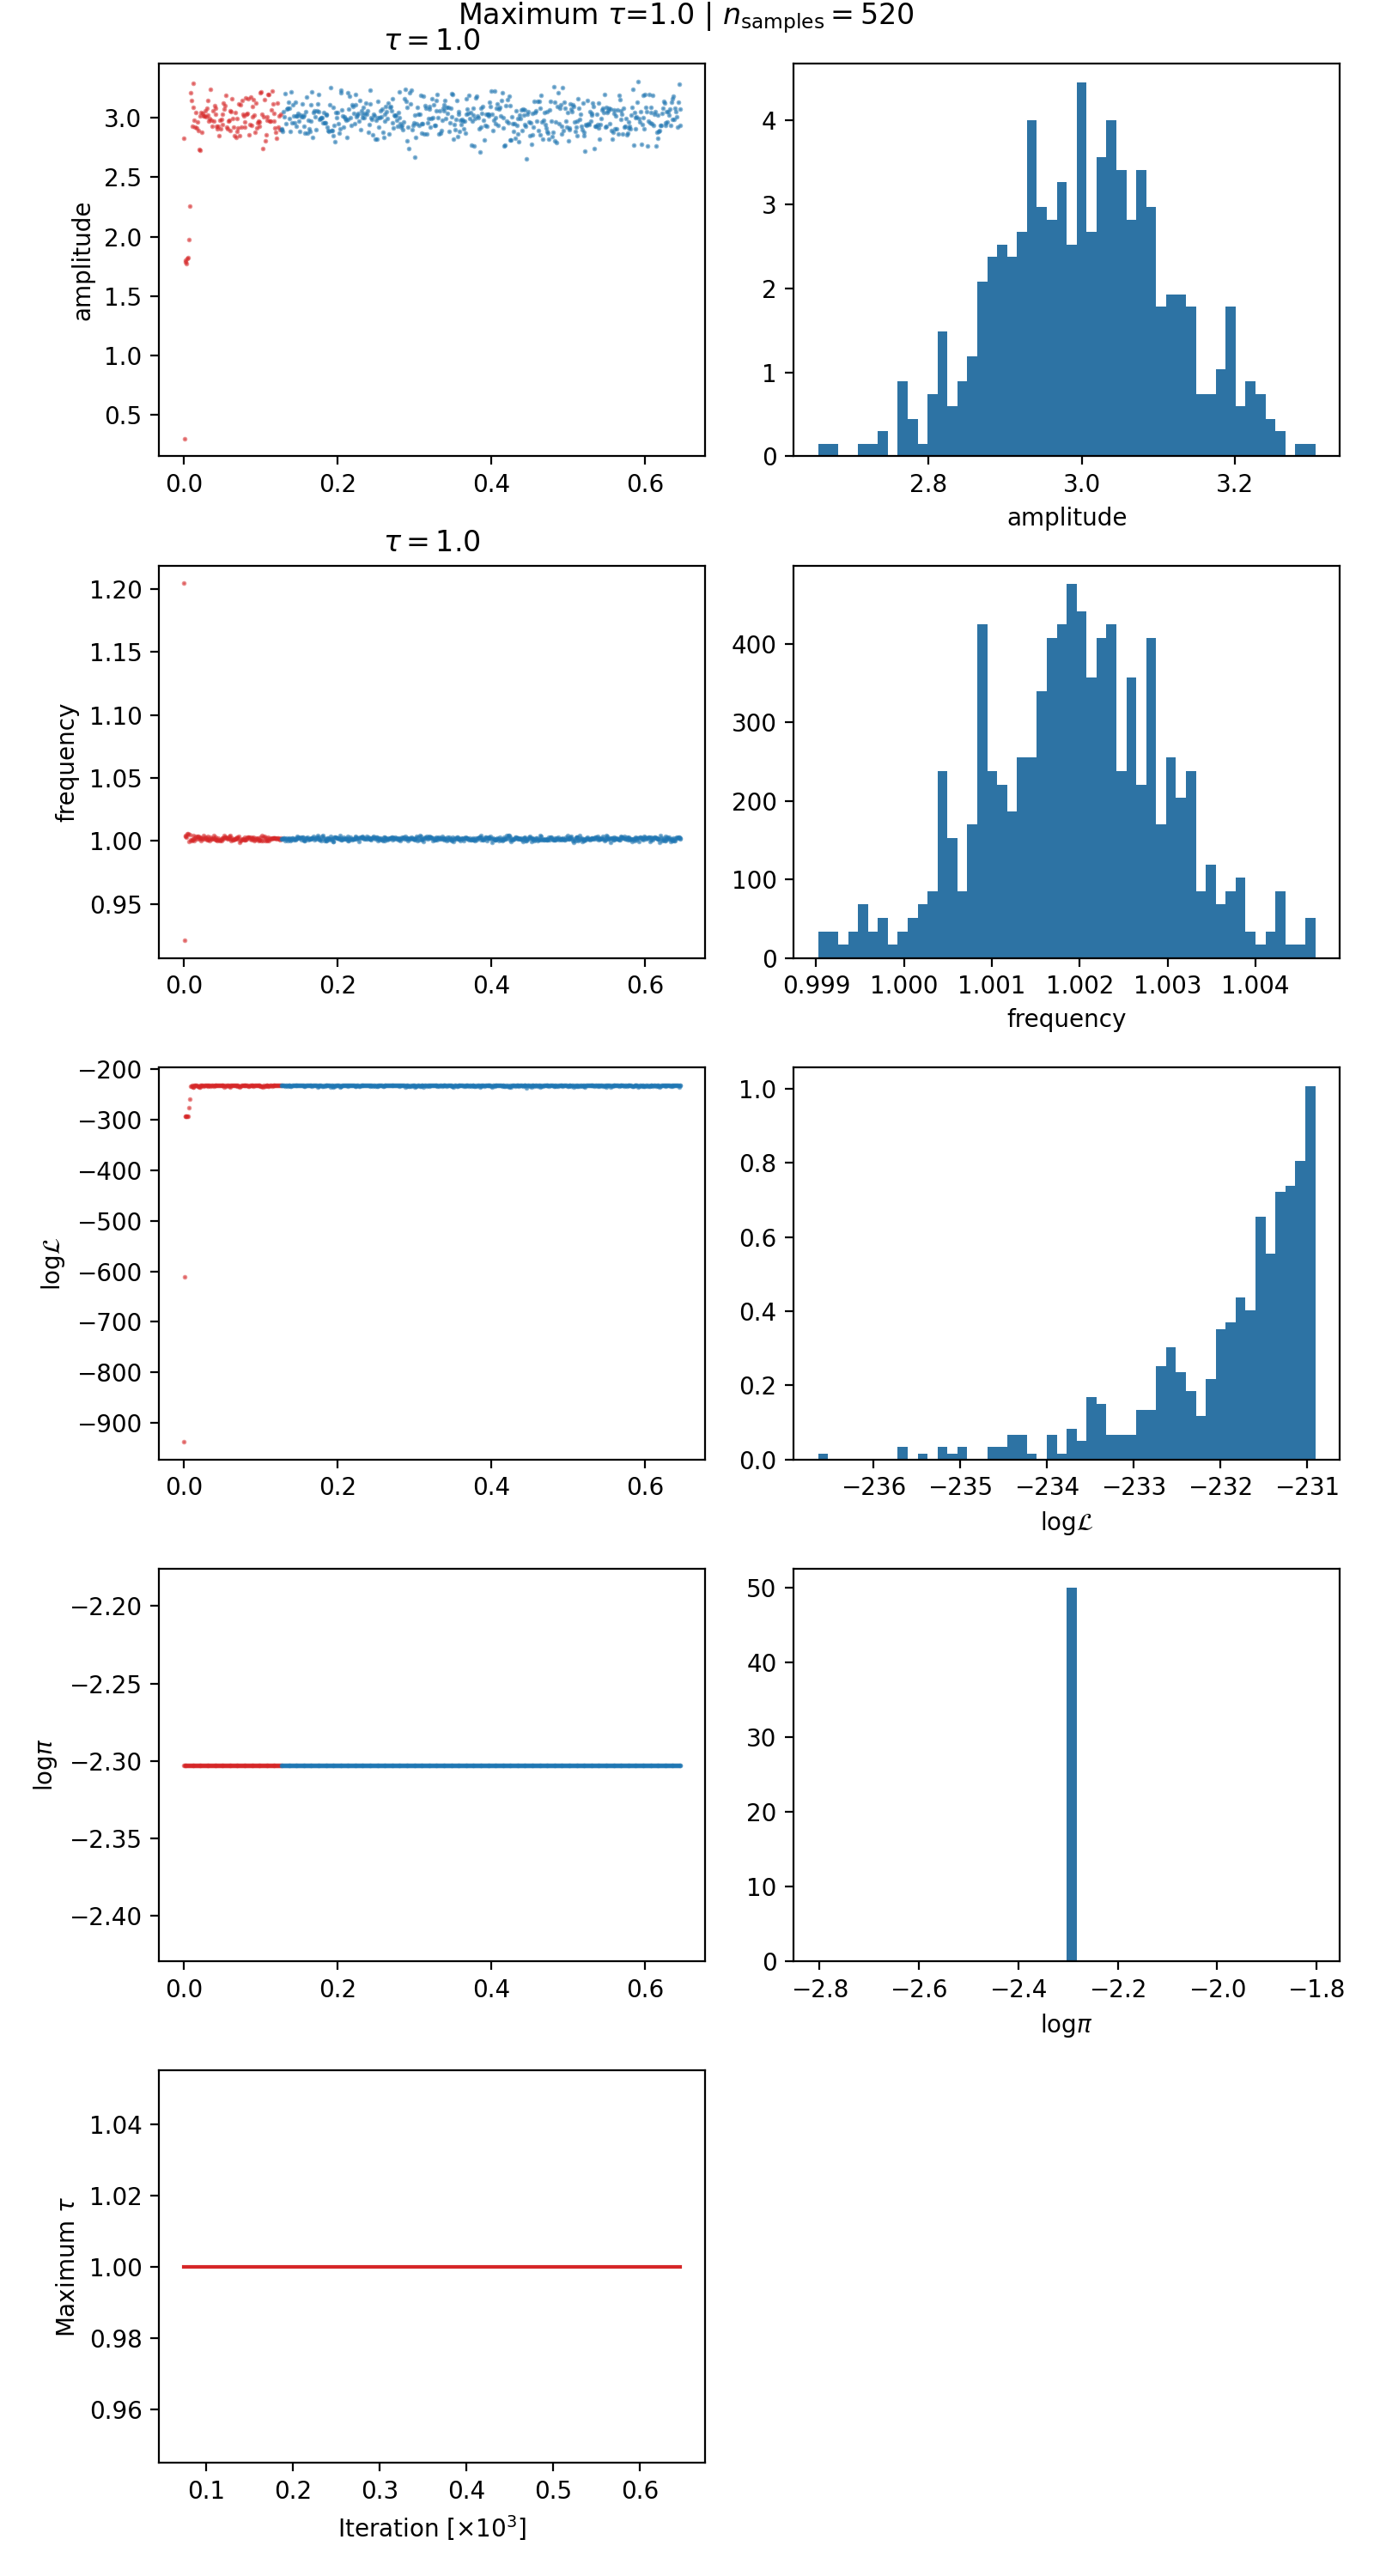

In [7]:
from IPython import display
display.Image("outdir_Bilby-MCMC_I/runA_E0_T0_checkpoint_trace.png")

## Using Bilby-MCMC: why is the autocorrelation time always 1?

In teh figure above, you may be surprised that the autocorrelation time `tau` is always 1. The reason for this is that, by default, `bilby_mcmc` take a number of *internal steps* before adding to the MCMC chain. Each step individually respects the Markovian nature, in effect we are pre-thinning the chain. This is done to reduce the computational overheads associated with storing many samples which will ultimately be discarded and to improve the scaling efficiency when we parallelise with multiple threads on a CPU. 

Let's re-run the analysis above, but set the number of internal steps `L1steps` to 1 i.e. make `bilby_mcmc` behave like a regular sampler. (FYI `L1steps=100` by default).


In [10]:
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    injection_parameters=simulation_parameters,
    outdir=outdir,
    label="runB",
    sampler='bilby_mcmc',
    printdt=5,
    nsamples=500,
    ntemps=6,
    resume=False,
    adapt=False,
    L1steps=1,  # Set L1steps to 1
)

13:23 bilby INFO    : Running for label 'runB', output will be saved to 'outdir_Bilby-MCMC_I'
13:23 bilby WARNING : Parameter logp has no default prior and is set to -2.3025850929940455, this will not be sampled and may cause an error.
13:23 bilby WARNING : Parameter logl has no default prior and is set to -501.69780664137784, this will not be sampled and may cause an error.
13:23 bilby INFO    : Search parameters:
13:23 bilby INFO    :   amplitude = Uniform(minimum=0, maximum=5, name='amplitude', latex_label='amplitude', unit=None, boundary=None)
13:23 bilby INFO    :   frequency = Uniform(minimum=0, maximum=2, name='frequency', latex_label='frequency', unit=None, boundary=None)
13:23 bilby INFO    : Single likelihood evaluation took 2.810e-04 s
13:23 bilby INFO    : Using sampler Bilby_MCMC with kwargs {'nsamples': 500, 'nensemble': 1, 'pt_ensemble': False, 'ntemps': 6, 'Tmax': None, 'Tmax_from_SNR': 20, 'initial_betas': None, 'adapt': False, 'adapt_t0': 100, 'adapt_nu': 10, 'pt_reje

4.86e+03|0:00:05|1.99e+03(10tau)|t=56|n=51|a=0.12|e=1.7e-01%|1.06ms/ev|maxl=-230.91|ETF=0:00:26


13:23 bilby INFO    : Starting NF training
/home/greg/programs/anaconda3/envs/bilby/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag
13:24 bilby INFO    : Flow training step (1000) finished for length 4917 chain, took 7.32s. Current accept-ratio=0.00


4.92e+03|0:00:12|5.55e+02(10tau)|t=56|n=78|a=0.12|e=2.6e-01%|128.52ms/ev|maxl=-230.91|ETF=0:50:10


13:24 bilby INFO    : Gaussian KDE construction at 1000 finished for length 4924 chain, took 0.03s. Current accept-ratio=0.01
13:24 bilby INFO    : Gaussian KDE construction at 1000 finished for length 4928 chain, took 0.02s. Current accept-ratio=0.05
13:24 bilby INFO    : Gaussian Mixture Model construction at 1000 finished for length 4959 chain, took 0.10s. Current accept-ratio=0.06
13:24 bilby INFO    : Starting NF training
13:24 bilby INFO    : Flow training step (1000) finished for length 4962 chain, took 6.58s. Current accept-ratio=0.01


4.96e+03|0:00:19|5.55e+02(10tau)|t=56|n=79|a=0.12|e=2.7e-01%|153.91ms/ev|maxl=-230.91|ETF=0:59:56


13:24 bilby INFO    : Starting NF training
13:24 bilby INFO    : Flow training step (1000) finished for length 4986 chain, took 6.58s. Current accept-ratio=0.00


4.99e+03|0:00:26|5.55e+02(10tau)|t=56|n=79|a=0.12|e=2.6e-01%|278.14ms/ev|maxl=-230.91|ETF=1:48:18


13:24 bilby INFO    : Gaussian KDE construction at 1000 finished for length 4994 chain, took 0.02s. Current accept-ratio=0.00
13:24 bilby INFO    : Gaussian Mixture Model construction at 1000 finished for length 5039 chain, took 0.06s. Current accept-ratio=0.00
13:24 bilby INFO    : Starting NF training
13:24 bilby INFO    : Flow training step (1000) finished for length 5050 chain, took 6.65s. Current accept-ratio=0.00


5.05e+03|0:00:33|5.55e+02(10tau)|t=56|n=81|a=0.12|e=2.7e-01%|111.64ms/ev|maxl=-230.91|ETF=0:43:16


13:24 bilby INFO    : Gaussian KDE construction at 1000 finished for length 5065 chain, took 0.03s. Current accept-ratio=0.00
13:24 bilby INFO    : Gaussian Mixture Model construction at 1000 finished for length 5069 chain, took 0.05s. Current accept-ratio=0.00
13:24 bilby INFO    : Starting NF training
13:24 bilby INFO    : Flow training step (1000) finished for length 5113 chain, took 6.79s. Current accept-ratio=0.07


5.11e+03|0:00:40|5.55e+02(10tau)|t=56|n=82|a=0.12|e=2.7e-01%|116.71ms/ev|maxl=-230.91|ETF=0:45:07


13:24 bilby INFO    : Gaussian Mixture Model construction at 1000 finished for length 5180 chain, took 0.10s. Current accept-ratio=0.00
13:24 bilby INFO    : Starting NF training
13:24 bilby INFO    : Flow training step (1000) finished for length 5242 chain, took 6.99s. Current accept-ratio=0.00


5.24e+03|0:00:48|5.55e+02(10tau)|t=56|n=84|a=0.13|e=2.7e-01%|63.54ms/ev|maxl=-230.91|ETF=0:24:26


13:24 bilby INFO    : Gaussian Mixture Model construction at 1000 finished for length 5271 chain, took 0.27s. Current accept-ratio=0.01


5.70e+03|0:00:53|5.55e+02(10tau)|t=56|n=92|a=0.16|e=2.7e-01%|11.08ms/ev|maxl=-230.91|ETF=0:04:10
6.02e+03|0:00:58|5.55e+02(10tau)|t=56|n=98|a=0.17|e=2.7e-01%|15.21ms/ev|maxl=-230.91|ETF=0:05:39
6.47e+03|0:01:03|5.55e+02(10tau)|t=56|n=106|a=0.19|e=2.7e-01%|11.30ms/ev|maxl=-230.91|ETF=0:04:07
6.93e+03|0:01:08|5.55e+02(10tau)|t=56|n=114|a=0.21|e=2.7e-01%|10.85ms/ev|maxl=-230.91|ETF=0:03:52
7.34e+03|0:01:13|5.55e+02(10tau)|t=56|n=122|a=0.23|e=2.8e-01%|12.08ms/ev|maxl=-230.91|ETF=0:04:13
7.88e+03|0:01:18|5.55e+02(10tau)|t=56|n=132|a=0.24|e=2.8e-01%|9.33ms/ev|maxl=-230.91|ETF=0:03:10
8.29e+03|0:01:23|5.55e+02(10tau)|t=56|n=139|a=0.25|e=2.8e-01%|12.17ms/ev|maxl=-230.91|ETF=0:04:03
8.69e+03|0:01:28|5.55e+02(10tau)|t=56|n=146|a=0.26|e=2.8e-01%|12.66ms/ev|maxl=-230.91|ETF=0:04:08
8.98e+03|0:01:33|5.55e+02(10tau)|t=56|n=151|a=0.26|e=2.8e-01%|17.17ms/ev|maxl=-230.91|ETF=0:05:32
9.24e+03|0:01:38|5.55e+02(10tau)|t=56|n=156|a=0.27|e=2.8e-01%|18.82ms/ev|maxl=-230.91|ETF=0:05:59
9.52e+03|0:01:43|5.55e+

13:26 bilby INFO    : Reached convergence: exiting sampling
13:26 bilby INFO    : Checkpoint start
13:26 bilby INFO    : Written checkpoint file outdir_Bilby-MCMC_I/runB_resume.pickle
13:26 bilby INFO    : Zero-temperature proposals:
13:26 bilby INFO    : AdaptiveGaussianProposal(acceptance_ratio:0.21,n:2.3e+03,scale:0.001,)
13:26 bilby INFO    : DifferentialEvolutionProposal(acceptance_ratio:0.44,n:2.6e+03,)
13:26 bilby INFO    : UniformProposal(acceptance_ratio:1,n:21,)
13:26 bilby INFO    : KDEProposal(acceptance_ratio:0.47,n:2.4e+03,trained:1,)
13:26 bilby INFO    : GMMProposal(acceptance_ratio:0.41,n:2.4e+03,trained:1,)
13:26 bilby INFO    : NormalizingFlowProposal(acceptance_ratio:0.017,n:2.5e+03,trained:1,)
13:26 bilby INFO    : Current taus={'amplitude': 21.6, 'frequency': 10.4}
13:26 bilby INFO    : Temperature swaps = 4044
13:26 bilby INFO    : Temp:0<->1|beta=1|hot-samp=536|swap=0.52|conv=True|
13:26 bilby INFO    : Temp:1<->2|beta=0.3466|hot-samp=612|swap=0.56|conv=True|
13

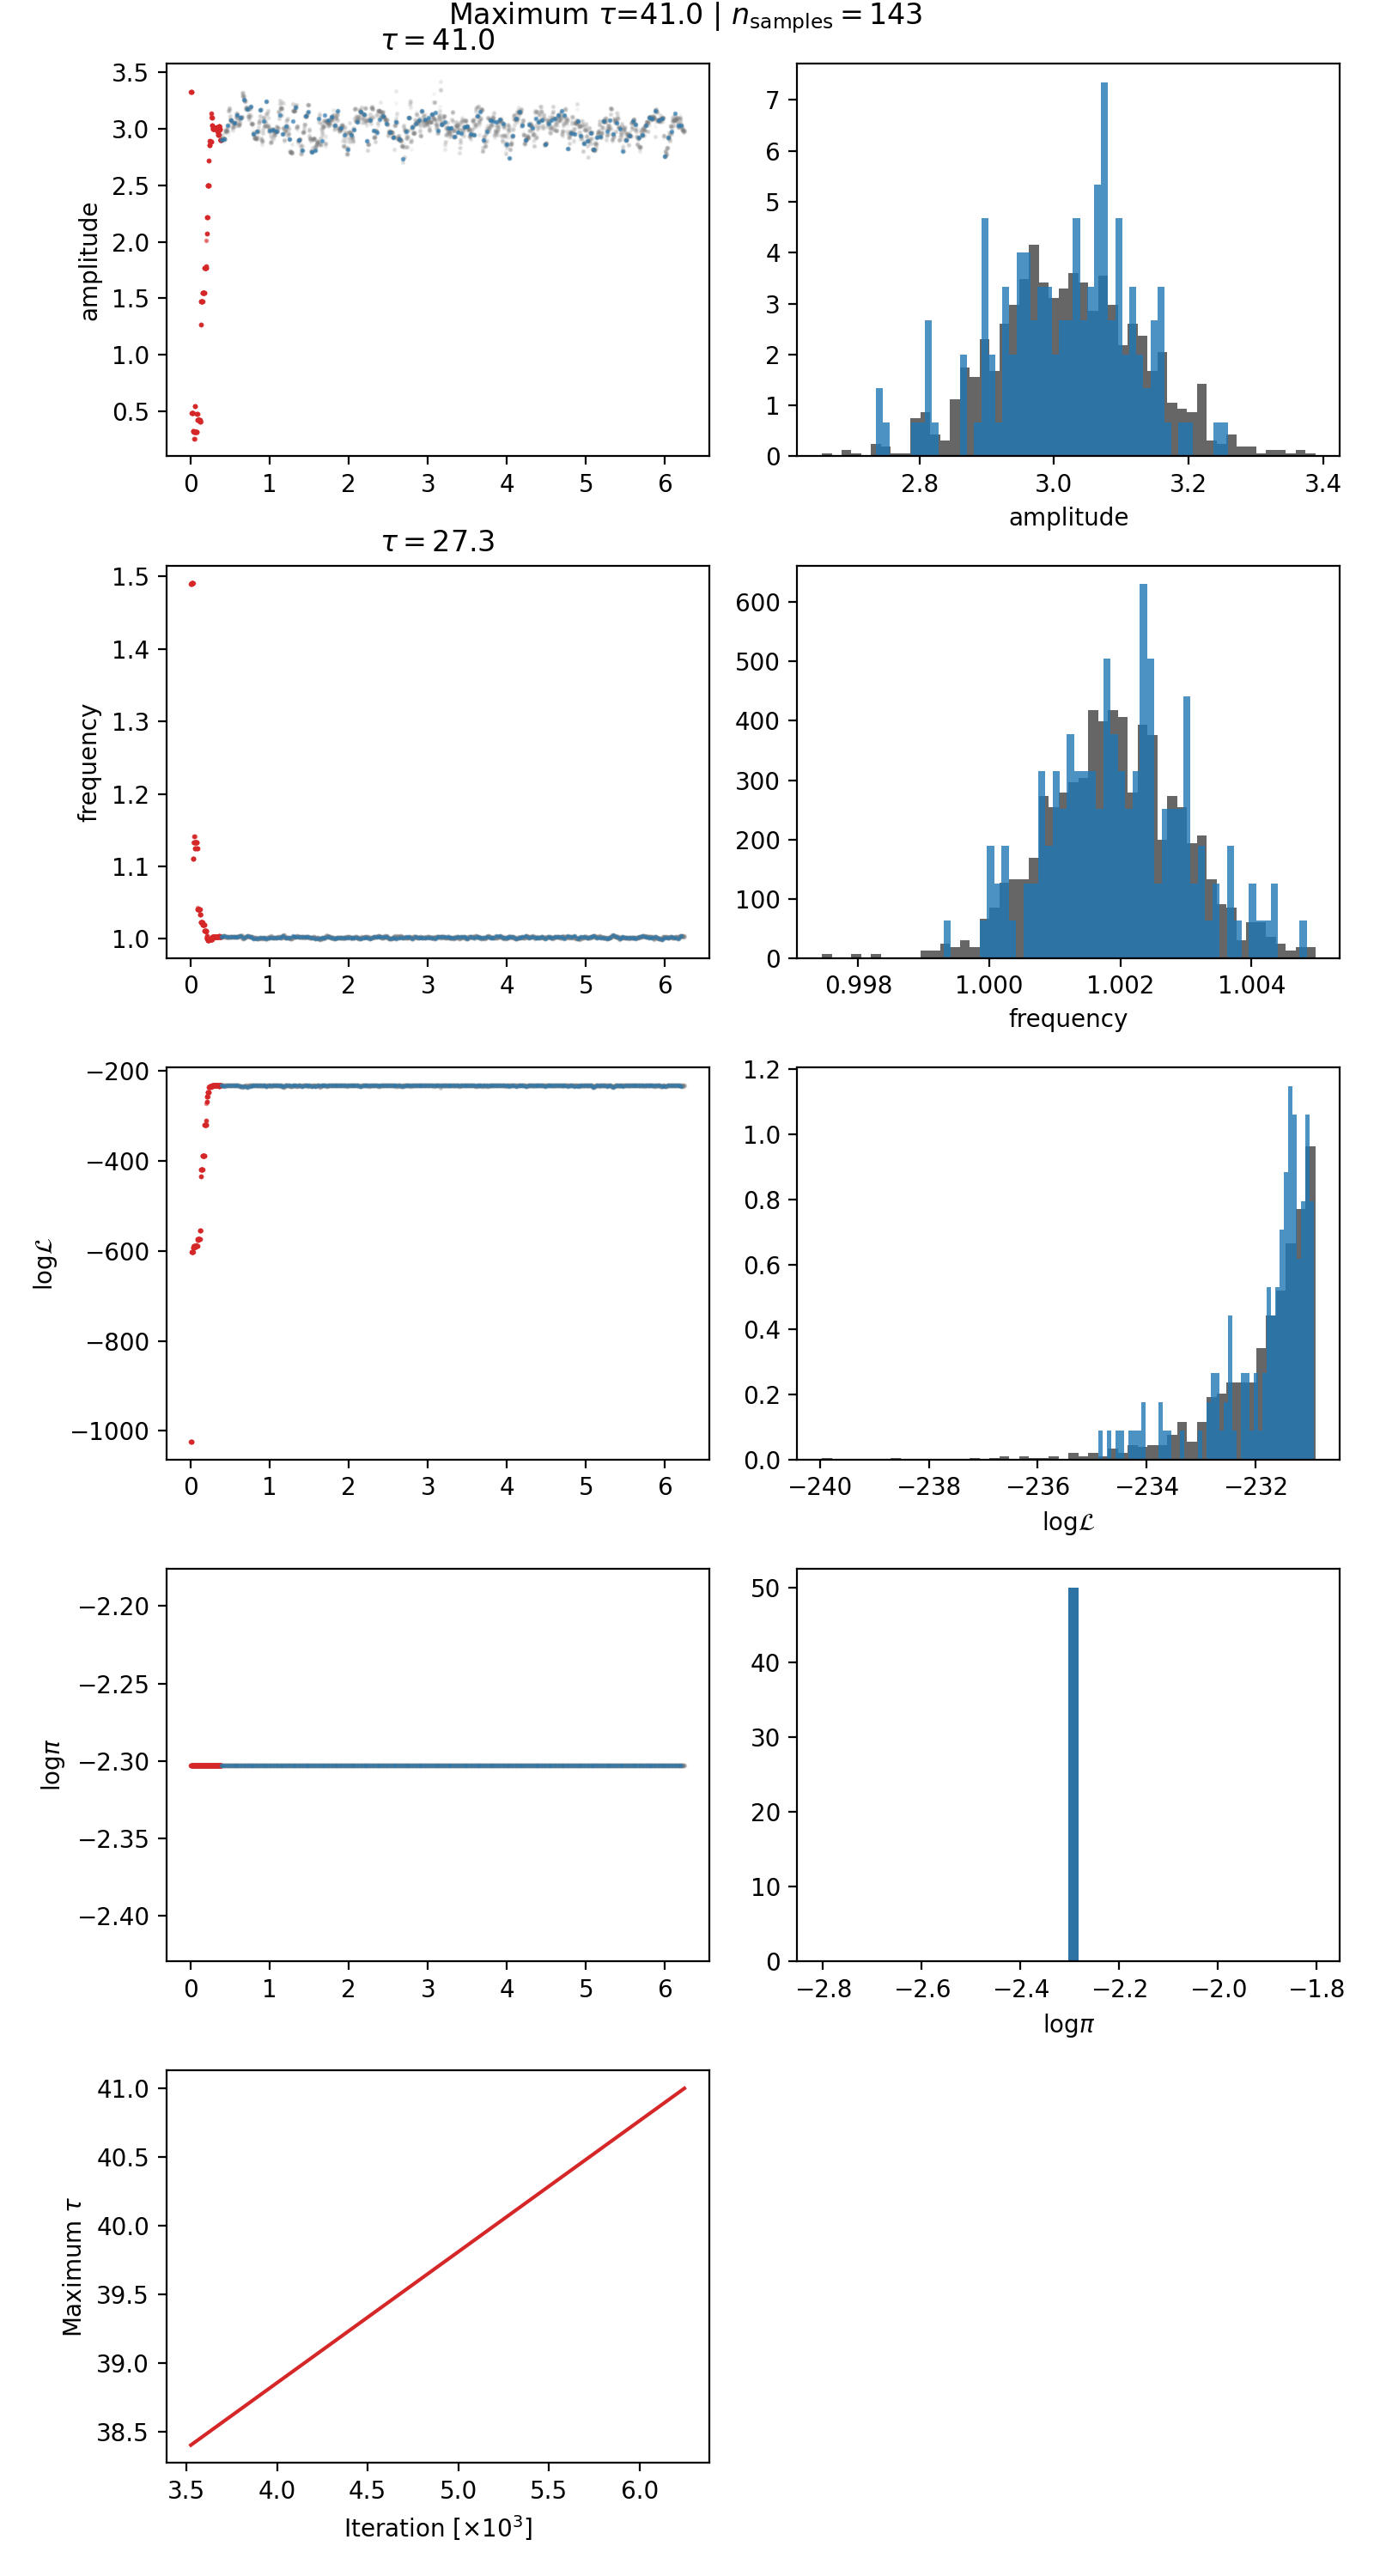

In [17]:
from IPython import display
display.Image("outdir_Bilby-MCMC_I/runB_E0_T0_checkpoint_trace.png")

Okay, that is better. Now we can see that the ACT is something like 20 (on a simple analysis like this, it is typically massively overestimated). Looking now at the traceplots, you will see gray points in the background. These are the full set of steps while the blue points are only those taken as posterior samples.

## Using Bilby-MCMC: how do I use an ensemble sampler like `emcee`?

`bilby_mcmc` comes equiped with the option to use ensemble sampling. A "cloud" of points are evolved together with steps for a give "walker" in the cloud proposed based on the walkers complement. To use `bilby_mcmc` in this mode, simply add `nensemble` to the list of arguments.

**Note**: we can also use parallel-tempering (below we do not). You can choose if you want the whole ensemble to be parallel-tempered or just the primary chain with `pt_ensemble`. 

In my experience, the benefit of ensemble sampling come predominantly when you have a difficult-to-sample space without good custom proposals. In practise, `bilby_mcmc` is poorly optimized for ensemble sampling and if you need it, you'd be better off using `emcee` or it's parallel-tempered spin off `ptemcee`. But, the feature is here in case it is useful. 

In [13]:
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    injection_parameters=simulation_parameters,
    outdir=outdir,
    label="runC",
    sampler='bilby_mcmc',
    printdt=5,
    nsamples=500,
    ntemps=1,
    nensemble=10,
    resume=False,
    adapt=False,
    L1steps=1,  # Set L1steps to 1
)

13:41 bilby INFO    : Running for label 'runB', output will be saved to 'outdir_Bilby-MCMC_I'
13:41 bilby WARNING : Parameter logp has no default prior and is set to -2.3025850929940455, this will not be sampled and may cause an error.
13:41 bilby WARNING : Parameter logl has no default prior and is set to -671.8593275529283, this will not be sampled and may cause an error.
13:41 bilby INFO    : Search parameters:
13:41 bilby INFO    :   amplitude = Uniform(minimum=0, maximum=5, name='amplitude', latex_label='amplitude', unit=None, boundary=None)
13:41 bilby INFO    :   frequency = Uniform(minimum=0, maximum=2, name='frequency', latex_label='frequency', unit=None, boundary=None)
13:41 bilby INFO    : Single likelihood evaluation took 3.320e-04 s
13:41 bilby INFO    : Using sampler Bilby_MCMC with kwargs {'nsamples': 500, 'nensemble': 10, 'pt_ensemble': False, 'ntemps': 1, 'Tmax': None, 'Tmax_from_SNR': 20, 'initial_betas': None, 'adapt': False, 'adapt_t0': 100, 'adapt_nu': 10, 'pt_reje

3.52e+03|0:00:05|1.58e+03(10tau)|t=38|n=288|a=0.24|e=8.2e-01%|1.89ms/ev|maxl=-230.91|ETF=0:00:15
6.25e+03|0:00:10|3.84e+02(10tau)|t=38|n=1248|a=0.26|e=2.0e+00%|2.45ms/ev|maxl=-230.91|ETF=0


13:41 bilby INFO    : Reached convergence: exiting sampling
13:41 bilby INFO    : Checkpoint start
13:41 bilby INFO    : Written checkpoint file outdir_Bilby-MCMC_I/runB_resume.pickle
13:41 bilby INFO    : Zero-temperature proposals:
13:41 bilby INFO    : AdaptiveGaussianProposal(acceptance_ratio:0.2,n:9.2e+02,scale:1e-05,)
13:41 bilby INFO    : DifferentialEvolutionProposal(acceptance_ratio:0.41,n:9.4e+02,)
13:41 bilby INFO    : UniformProposal(acceptance_ratio:1,n:9,)
13:41 bilby INFO    : KDEProposal(acceptance_ratio:0,n:9.4e+02,trained:0,)
13:41 bilby INFO    : GMMProposal(acceptance_ratio:0.0011,n:9.1e+02,trained:0,)
13:41 bilby INFO    : NormalizingFlowProposal(acceptance_ratio:0,n:9.7e+02,trained:0,)
13:41 bilby INFO    : Current taus={'amplitude': 41.0, 'frequency': 27.3}
13:41 bilby INFO    : Ensemble swaps = 1562
13:41 bilby INFO    : ProposalCycle:
  EnsembleStretch(acceptance_ratio:0.68,n:1.6e+04,)

13:41 bilby INFO    : Creating diagnostic plots
13:41 bilby INFO    : Check

When you run an ensemble, multiple trace plots will be produced: one for each walker. These are labelled by `En` where `n` is the walker number:

In [18]:
! ls outdir_Bilby-MCMC_I/runC*

ls: cannot access 'outdir_Bilby-MCMC_I/runC*': No such file or directory
